# Face Detection and Recognition

The two most popular classifiers for Face Recognition are Haar Cascades and (the more advanced) Local Binary Patterns. In this notebook, we'll look at Haar Cascades to detect objects (in our case faces) using OpenCV. 

This method was proposed in 2001 in the paper [Rapid object detection using a boosted cascade of simple features](https://ieeexplore.ieee.org/document/990517) by Viola and Jones. 

## Haar Cascades
The Haar Cascades are classifiers based on machine learning techniques. They use haar-like features to determine if a region of an image "could be a face".

![Haar Cascade](haar_cascades.jpeg)

The model is saved out into an XML file which has been trained to detect to a particular object. We will demonstrate face (and eye) detection using such pretrained models.

If you missed the lecture on Haar Cascades, you can find a similar explanation on how it works [here](https://www.youtube.com/watch?v=uEJ71VlUmMQ)

In [2]:
%%HTML 
<p> Video demonstrating Haar Cascades in Action for Face Detection </p>
<iframe width="560" height="315" src="https://www.youtube.com/embed/hPCTwxF0qf4?start=54" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Face Detection

In [3]:
#import libraries
import numpy as np
import cv2
%matplotlib inline
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

import os #need this for path manipulation and listing directories

#Simple function to fix colors before displaying them in matplotlib
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Create seperate classifiers for the face and eyes

Several pre-trained cascade files can be found in the link https://github.com/opencv/opencv/tree/master/data/haarcascades

For the faces, we'll just use "haarcascade_frontalface_alt" and for the eyes "haarcascade_eye".

**Load the cascade files from the model directory.**

These steps read in an XML file, parses it, deserialises and loads it into memory for further use.

There's two ways to load in these models

In [4]:
#method 1
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    

In [5]:
#method 2
face_cascade = cv2.CascadeClassifier()
if not face_cascade.load(cv2.samples.findFile('haarcascade_frontalface_alt.xml')):
    print('--(!)Error loading face cascade')

eye_cascade = cv2.CascadeClassifier()
if not eye_cascade.load(cv2.samples.findFile('haarcascade_eye.xml')):
    print('--(!)Error loading eye cascade')


## Reading and PreProcessing Image

In the preprocessing steps we will convert the picture to a B/W and then equalise histograms to improve the contrast. This helps the algorithm to delineate features. For e.g., the eyes usually are lighter than the cheeks, the pupils are darker etc. Enhancing contrasts improves the detectability of features and hence improves object detection.

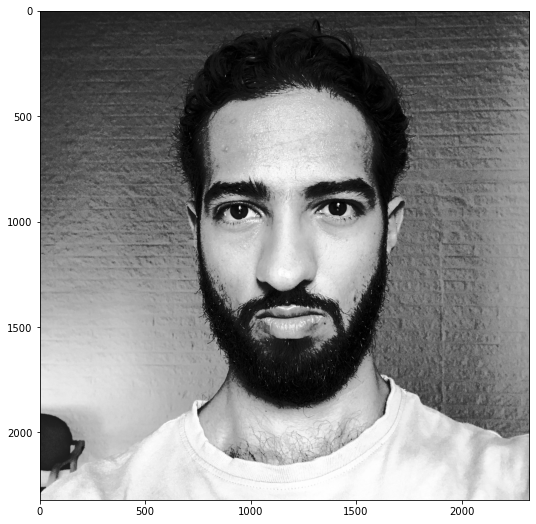

In [6]:
image = cv2.imread('straight_face.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray) 
plt.imshow(fixColor(gray))

## Apply Cascade Filters
The detection is done using an inbuilt function called detectMultiScale. 

cv.CascadeClassifier.detectMultiScale(	image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]

It has 3 important parameters that can be tuned to improved detection.

1. scaleFactor: The object can be at different scales in an image. For e.g. a face closer to camera will be larger than the one further away. The scale factor is used to build a scale pyramid with each step smaller by a factor. Here the factor is 30%, (scaleFactor 1.3)

2. minNeighbors: The classifier will detect multiple windows around the face. This parameter defines the minimum number of windows the classifier must detect to declare the detected object as positive.

3. minSize - Objects smaller than the specified size will be ignored. Specified as (x, y). 


In [7]:
scaleFactor = 1.3
minNeighbors = 5
faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
print(f'Number of faces found = {len(faces)}')

Number of faces found = 1


**Showing the results using bounding boxes**

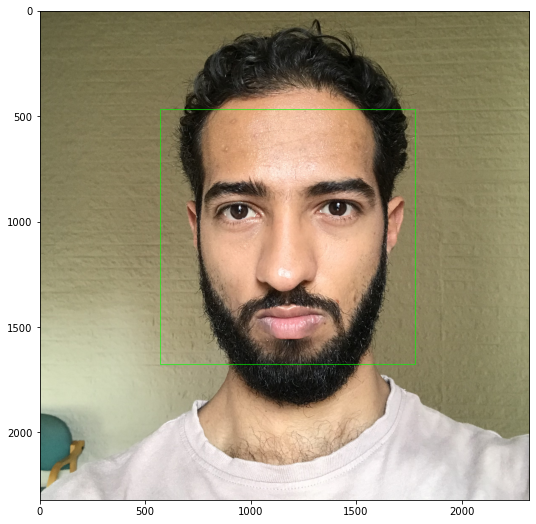

In [8]:
image2 = image.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(image2, (x,y), (x+w,y+h), (0,255,0), thickness=2)
plt.imshow(fixColor(image2))

Now let's do eye detection within the area determined to be the face

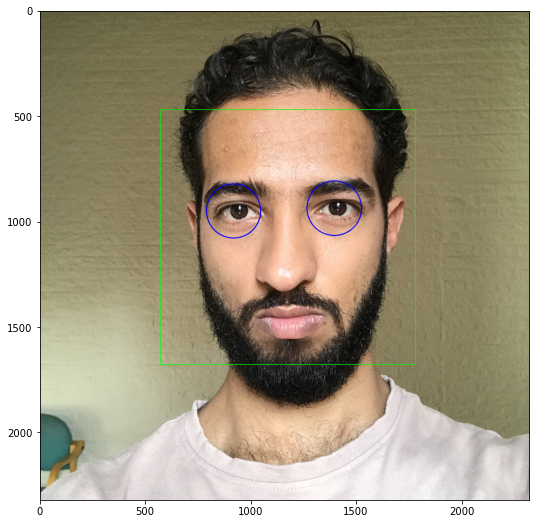

In [9]:
for (x,y,w,h) in faces:
    #isolate the region of interest
    faceROI = gray[y:y+h,x:x+w]
    #Detect eyes in the face
#     eyes = eye_cascade.detectMultiScale(faceROI)
    eyes = eye_cascade.detectMultiScale(faceROI, 1.1, 4, 0,(50,50))
    for (x2,y2,w2,h2) in eyes:
        eye_center = (x + x2 + w2//2, y + y2 + h2//2)
        radius = int(round((w2 + h2)*0.25))
        cv2.circle(image2, eye_center, radius, (255, 0, 0 ), 4)
plt.imshow(fixColor(image2))


**Complete face detection code** (for experimentation)

In [10]:
#looping through folder to find images
from os import listdir
from os.path import isfile, join
pics = []
labelsfilepath='/something/here' #pass into below -> listdir(labelsfilepath) and isfile(join(labelsfilepath, f))

labels = [f for f in listdir() if isfile(f) and f.endswith('.jpg')]
# labels = []
# for f in listdir():
#     if isfile(f) and f.endswith('.jpg'):
#         return labels.append(f)
print (labels)

['group.jpg', 'side_image.jpg', 'straight_face.jpg', 'figurine.jpg', 'slight_turn.jpg']


Number of faces found = 18


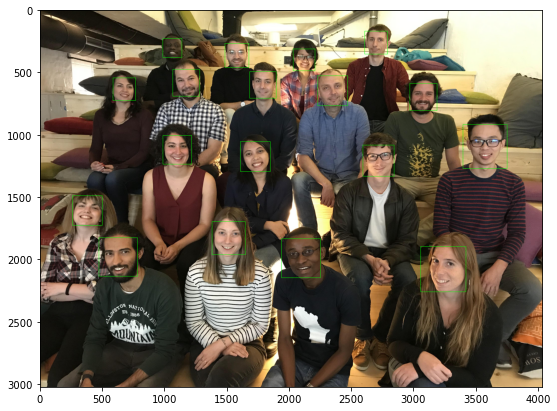

In [11]:
image = cv2.imread(labels[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=2)
print(f'Number of faces found = {len(faces)}')
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), thickness=2)
plt.imshow(fixColor(image))

#### Face Detection with Dlib HOG (Histogram of Oriented Gradients)

The idea of HOG descriptor is to create a vector of features so that the vector can be feed into a classification algorithm like SVM to predict the result. To calculate the HOG descriptor we need to calculate the gradients of x-axis and y-axis using Sobel kernel.

*run this (once) withiin jupyter to install dlib:*
 !conda install -c conda-forge dlib

For the most part, the code is pretty similar.

In [ ]:
import dlib

# loading the haar cascade classifier from XML file
detector = dlib.get_frontal_face_detector()

#read in the image
image = cv2.imread(labels[0])

# loading image into the detector
faces = detector(image, 1)

#annotate the image
for face in faces:
    x1, y1 = face.tl_corner().x, face.tl_corner().y
    x2, y2 = face.br_corner().x, face.br_corner().y
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)

# displaying the image
plt.imshow(fixColor(image))

### Side Bar

Haar Cascades are fast, and very efficient to run, especially if you have low-end hardware, but are very sensitive to noise and occlusion.

Alternatively, you can also do face detection using a pre-trained SSD model, like we did for Object Detection in the previous lecture.
The code below shows you how a Caffe model (last time we used Tensorflow) to achieve this. 
The prototxt file contains model information, and the caffemodel file contains the weights.

You can see how to download the models [here](https://github.com/opencv/opencv/tree/master/samples/dnn)

The values we use (as model parameters) can be seen in the [models.yml file](https://github.com/opencv/opencv/blob/master/samples/dnn/models.yml) on there.

As a bonus, this code runs live from a camera view instead of just processing a stored image file. 
In the same folder as this notebook, you'll find two files :
* Test_Camera_Access.py - use this first to test if your camera is working. Hit ESC to exit.
* Face_Detection.py - use this to detect faces



In [ ]:
#DO NOT RUN THIS HERE, THE RELATIVE PATHS ARE INCORRECT

import cv2
import sys

s = 0 #specify camera index (default webcam)

#checks to see if there's a command line value parsed in to overide this value
if len(sys.argv) > 1:
    s = sys.argv[1]

#access the camera and capture video
source = cv2.VideoCapture(s)

#create a window to send video to
win_name = 'Camera Preview'
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

net = cv2.dnn.readNetFromCaffe("deploy.prototxt",
                               "res10_300x300_ssd_iter_140000_fp16.caffemodel")
# Model parameters
in_width = 300
in_height = 300
mean = [104, 117, 123]
conf_threshold = 0.7

while cv2.waitKey(1) != 27: #checks if user has hit ESC key
    has_frame, frame = source.read() #has_frame is a logical variable that tells us if there's a problem
    if not has_frame:
        break
    
    frame = cv2.flip(frame,1) #flip image for convenience
    frame_height = frame.shape[0]
    frame_width = frame.shape[1]

    # Create a blob from the frame, just like we did with tensorflow. Note how RB isn't swapped!
    blob = cv2.dnn.blobFromImage(frame, 1.0, (in_width, in_height), mean, swapRB = False, crop = False)
    
    # Run the model
    net.setInput(blob)
    detections = net.forward()
    
    #Annotate faces on the frame if they are above the threshold
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x_left_bottom = int(detections[0, 0, i, 3] * frame_width)
            y_left_bottom = int(detections[0, 0, i, 4] * frame_height)
            x_right_top = int(detections[0, 0, i, 5] * frame_width)
            y_right_top = int(detections[0, 0, i, 6] * frame_height)

            cv2.rectangle(frame, (x_left_bottom, y_left_bottom), (x_right_top, y_right_top), (0, 255, 0))
            label = "Confidence: %.4f" % confidence
            label_size, base_line = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

            cv2.rectangle(frame, (x_left_bottom, y_left_bottom - label_size[1]),
                                (x_left_bottom + label_size[0], y_left_bottom + base_line),
                                (255, 255, 255), cv2.FILLED)
            cv2.putText(frame, label, (x_left_bottom, y_left_bottom),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    t, _ = net.getPerfProfile() #tells us how long it takes to perform inference
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(frame, label, (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0))
    cv2.imshow(win_name, frame)

source.release()
cv2.destroyWindow(win_name)

In [ ]:
# alternative method of controlling what's shown/exiting the window with a specific letter
"""
alive = True
while alive:
    has_frame, frame = source.read()
    ...
    cv2.imshow(win_name, frame)

    key = cv2.waitKey(1)
    if key == ord('Q') or key == ord('q') or key == 27:
        alive = False
"""

# Face Recognition
To start with, we have 5 people we want to recognise. For each, we have a folder, with about 20 images of that person.

Instead of building a model from scratch, we're gonna use OpenCV's built-in recogniser for this. 

We will need to first train it on all the images in our folders.

### Read in the Images into a Training Set

In [12]:
#create a list of all the people we have images for
people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling'] #you can type this manually

#or, you can loop over every folder in the directory, and store the folder names into a list
"""people = []
for i in os.listdir(r'path/to/train/folder'):
    people.append(i)
"""

print(len(people))

5


In [13]:
# You need to put your own path to the Faces folder here (on Windows, the /'s may be \'s)
DIR = r'/Users/samer/Documents/Hanze Content/CVIP 2022/samers-public-repo/CVIP_Lecture_5/Faces/train'

#Load in Haar Cascade
#not necessary, since already loaded a better one above, but just to show that it's needed here + options
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

#empty lists to store our features and their corresponding labels
features = []
labels = []

#loop to go through every image, grab the face, and add that to our training set
def create_train():
    #loop over folders
    for person in people:
        path = os.path.join(DIR, person)
        label = people.index(person) #puts labels as 0,1,2... etc instead of the name.
        
        #loop over images in that folder
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            
            #read in the image
            img_array = cv2.imread(img_path)
            if img_array is None:
                continue 
            #convert it to grayscale (can you think of any further processing that can improve on this?)    
            gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
            
            #save out the faces into the features array, and their corresponding label (based on the folder we're in)
            for (x,y,w,h) in faces:
                faces_roi = gray[y:y+h, x:x+w]
                features.append(faces_roi)
                labels.append(label)

create_train()
print('Training data created')
print(f'Length of the featureset = {len(features)}')

Training data created
Length of the featureset = 100


### Train the Recogniser on Training Set

In [14]:
#convert to numpy arrays
features = np.array(features, dtype='object')
labels = np.array(labels)

#instantiate the model/recogniser
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

# Train the Recogniser on the features list and the labels list
face_recognizer.train(features,labels)

#optional, but done a lot in ML - save out the model
face_recognizer.save('face_trained.yml')

#extra - sometimes people also save out the features and labels so they don't have to make them again in future
np.save('features.npy', features)
np.save('labels.npy', labels)

### Use the Recogniser 

In [ ]:
#If you're starting from here (i.e. with a saved out model that you already trained), 
# then this is how you'd load in your model
"""
import numpy as np
import cv2 as cv

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
# features = np.load('features.npy', allow_pickle=True)
# labels = np.load('labels.npy')

face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('face_trained.yml')
"""

Label = Madonna with a confidence of 78.8381703966743


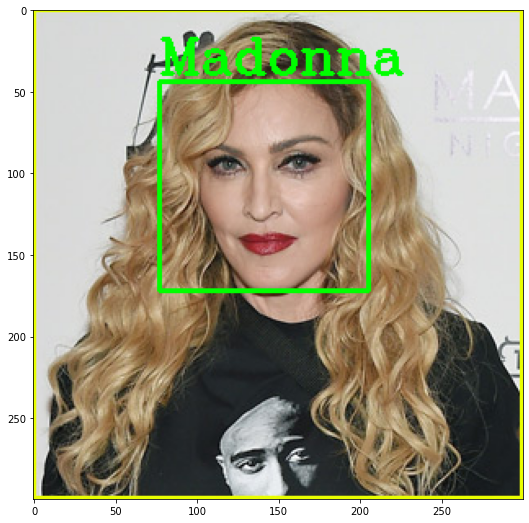

In [19]:
#read in the image you want to validate your model with
img = cv2.imread('Faces/val/madonna/3.jpg')

#convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect the face in the image
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

#Annotate the image
for (x,y,w,h) in faces:
    faces_roi = gray[y:y+h,x:x+w]

    label, confidence = face_recognizer.predict(faces_roi)
    print(f'Label = {people[label]} with a confidence of {confidence}')

    cv2.putText(img, str(people[label]), (x,y-5), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness=2)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), thickness=2)

    
plt.imshow(fixColor(img))

### End Note
Recogniser is not very accurate because of poor data quality, i.e.
* low amount of training images
* noise in images (read in 100 faces when we only had 90 images)
* not enough variety in images

Finally, I'd like to draw your attention to [this face recognition library](https://github.com/ageitgey/face_recognition). It's a bit slower than the method we use above, but is quickly gaining popularity due to it's high accuracy for known faces (with small training sets).